<a href="https://colab.research.google.com/github/harshadarsh/State-of-Charge-estimation-in-Electric-vehicle-using-ML-and-deep-learning-Model/blob/main/tatasteel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('Order_details(masked).csv')

# Convert 'Transaction Date' column to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

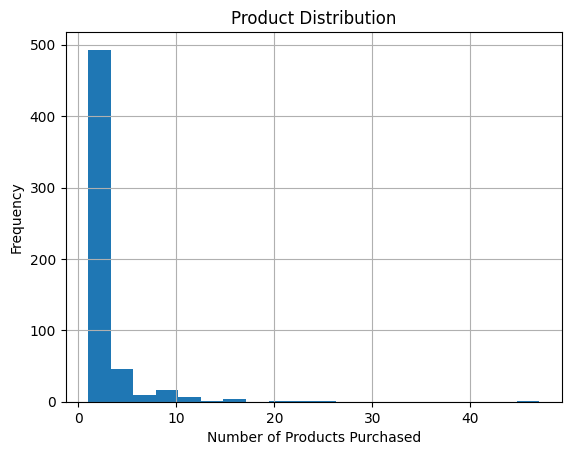

In [ ]:
# Product Distribution
product_counts = df['Product'].str.split(',').apply(lambda x: len(x))
product_counts.hist(bins=20)
plt.xlabel('Number of Products Purchased')
plt.ylabel('Frequency')
plt.title('Product Distribution')
plt.grid(True)
plt.show()

In [ ]:
# Repeat Customers
repeat_customers = df['Name'].value_counts()[df['Name'].value_counts() > 1]
print("Repeat Customers:")
print(repeat_customers)

Repeat Customers:
PERSON_470    5
PERSON_330    4
PERSON_75     3
PERSON_156    3
PERSON_290    3
PERSON_283    3
PERSON_263    2
PERSON_91     2
PERSON_207    2
PERSON_344    2
PERSON_343    2
PERSON_335    2
PERSON_71     2
PERSON_74     2
PERSON_195    2
PERSON_62     2
PERSON_477    2
PERSON_53     2
PERSON_52     2
PERSON_98     2
PERSON_435    2
PERSON_439    2
PERSON_247    2
PERSON_430    2
PERSON_181    2
PERSON_423    2
PERSON_180    2
PERSON_414    2
PERSON_172    2
PERSON_131    2
PERSON_378    2
PERSON_133    2
PERSON_170    2
PERSON_166    2
PERSON_402    2
PERSON_145    2
PERSON_45     2
PERSON_394    2
PERSON_6      2
PERSON_523    2
PERSON_30     2
PERSON_35     2
PERSON_8      2
PERSON_24     2
PERSON_11     2
PERSON_26     2
PERSON_298    2
Name: Name, dtype: int64


In [ ]:
# Popular Products
popular_products = df['Product'].str.split(',').explode().value_counts().head(5)
print("Popular Products:")
print(popular_products)

Popular Products:
PRODUCT_75    121
PRODUCT_63     97
PRODUCT_27     76
PRODUCT_25     59
PRODUCT_12     52
Name: Product, dtype: int64


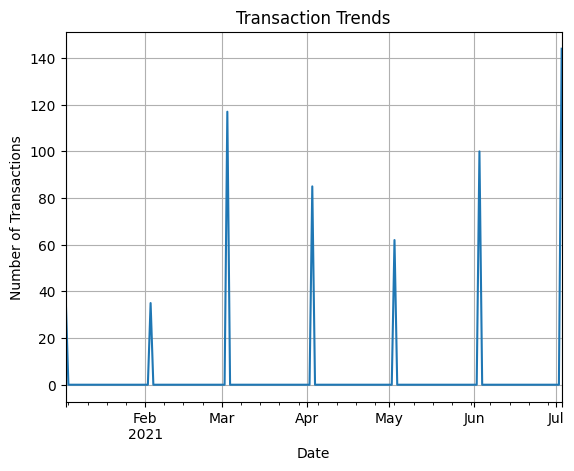

In [ ]:
# Transaction Trends
daily_transactions = df.set_index('Transaction Date').resample('D').size()
daily_transactions.plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transaction Trends')
plt.grid(True)
plt.show()

In [ ]:
# Email Providers
email_providers = df['Email'].str.split('@').str[1].value_counts().head(5)
print("Top Email Providers:")
print(email_providers)

Top Email Providers:
gmail.com         500
yahoo.com          12
hotmail.com         9
rediffmail.com      6
yahoo.co.in         5
Name: Email, dtype: int64


In [ ]:
#  Transaction Frequency
df['Time Diff'] = df['Transaction Date'].diff()
average_time_gap = df['Time Diff'].mean()
print("Average Time Gap between Transactions:", average_time_gap)


Average Time Gap between Transactions: 0 days 07:31:46.746551724


In [ ]:
#  Product Combination
product_combinations = df['Product'].str.split(',')
product_combinations_exploded = product_combinations.explode()
product_combinations_counts = product_combinations_exploded.value_counts().head(5)
print("Top Product Combinations:")
print(product_combinations_counts)

Top Product Combinations:
PRODUCT_75    121
PRODUCT_63     97
PRODUCT_27     76
PRODUCT_25     59
PRODUCT_12     52
Name: Product, dtype: int64


In [ ]:
# Customer Segmentation
customer_segments = pd.cut(df.groupby('Name')['Product'].count(), bins=[0, 1, 5, float('inf')], labels=['Occasional', 'Regular', 'Frequent'])
customer_segment_counts = customer_segments.value_counts()
print("Customer Segmentation:")
print(customer_segment_counts)

Customer Segmentation:
Occasional    478
Regular        47
Frequent        0
Name: Product, dtype: int64


In [ ]:
#  Transaction Day of the Week
df['Day of the Week'] = df['Transaction Date'].dt.day_name()
transaction_per_day = df['Day of the Week'].value_counts()
print("Transactions per Day of the Week:")
print(transaction_per_day)

Transactions per Day of the Week:
Saturday     229
Wednesday    152
Thursday     100
Monday        62
Sunday        38
Name: Day of the Week, dtype: int64


In [ ]:
#  Average Number of Products per Transaction
df['Product Count'] = df['Product'].str.split(',').apply(lambda x: len(x))
average_product_count = df['Product Count'].mean()
print("Average Number of Products per Transaction:", average_product_count)

Average Number of Products per Transaction: 2.3218588640275386


In [ ]:
#  Top Customers by Total Spent
df['Total Spent'] = df['Product'].str.split(',').apply(lambda x: len(x))  # Assume 1 unit = 1 currency
top_customers = df.groupby('Name')['Total Spent'].sum().nlargest(5)
print("Top Customers by Total Spent:")
print(top_customers)

Top Customers by Total Spent:
Name
PERSON_310    47
PERSON_330    32
PERSON_470    31
PERSON_522    25
PERSON_523    22
Name: Total Spent, dtype: int64


In [ ]:
# Repeat Purchased Products
purchased_products = df['Product'].str.split(',').explode()
repeat_products = purchased_products.value_counts()[purchased_products.value_counts() > 1]
print("Repeat Purchased Products:")
print(repeat_products)

Repeat Purchased Products:
PRODUCT_75    121
PRODUCT_63     97
PRODUCT_27     76
PRODUCT_25     59
PRODUCT_12     52
             ... 
PRODUCT_1       2
PRODUCT_39      2
PRODUCT_20      2
PRODUCT_46      2
PRODUCT_91      2
Name: Product, Length: 88, dtype: int64


In [ ]:
# Insight 15: Pricing Strategy
df['Price'] = df['Product'].str.split(',').apply(lambda x: len(x))  # Assuming 1 unit = 1 currency
product_prices = df.groupby('Product')['Price'].mean().sort_values(ascending=False)
print("Product Prices:")
print(product_prices)



Product Prices:
Product
PRODUCT_54,PRODUCT_60,PRODUCT_87,PRODUCT_38,PRODUCT_25,PRODUCT_71,PRODUCT_80,PRODUCT_48,PRODUCT_84,PRODUCT_16,PRODUCT_29,PRODUCT_50,PRODUCT_51,PRODUCT_56,PRODUCT_78,PRODUCT_35,PRODUCT_95,PRODUCT_22,PRODUCT_57,PRODUCT_1,PRODUCT_79,PRODUCT_39,PRODUCT_24,PRODUCT_20,PRODUCT_34,PRODUCT_46,PRODUCT_5,PRODUCT_59,PRODUCT_66,PRODUCT_15,PRODUCT_58,PRODUCT_31,PRODUCT_65,PRODUCT_19,PRODUCT_7,PRODUCT_91,PRODUCT_83,PRODUCT_28,PRODUCT_34,PRODUCT_4,PRODUCT_30,PRODUCT_63,PRODUCT_76,PRODUCT_90,PRODUCT_26,PRODUCT_27,PRODUCT_82    47.0
PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PRODUCT_63,PRODUCT_90,PRODUCT_25,PRODUCT_27,PRODUCT_95,PRODUCT_38,PRODUCT_78,PRODUCT_87,PRODUCT_51,PRODUCT_60,PRODUCT_72,PRODUCT_69,PRODUCT_86,PRODUCT_54,PRODUCT_26,PRODUCT_11,PRODUCT_76,PRODUCT_32,PRODUCT_30,PRODUCT_34,PRODUCT_24                                                                                                                                                                                     

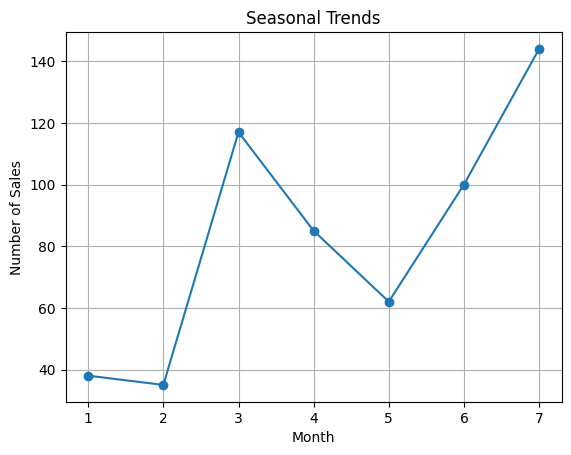

In [ ]:
#  Seasonal Trends
df['Month'] = pd.to_datetime(df['Transaction Date']).dt.month
monthly_sales = df.groupby('Month')['Product'].count()
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Seasonal Trends')
plt.grid(True)
plt.show()

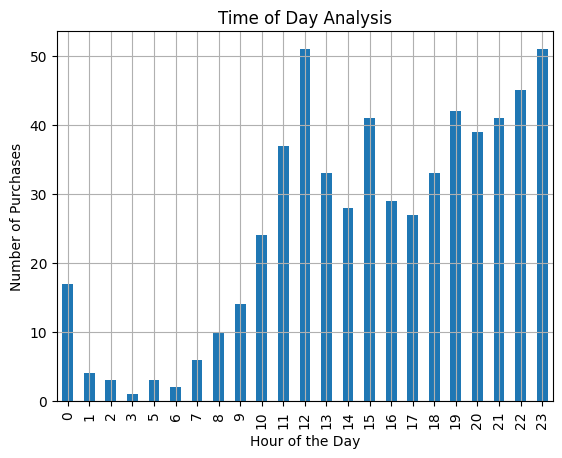

In [ ]:
#  Time of Day Analysis
df['Hour'] = pd.to_datetime(df['Transaction Date']).dt.hour
purchase_hours = df['Hour'].value_counts()
purchase_hours.sort_index().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.title('Time of Day Analysis')
plt.grid(True)
plt.show()

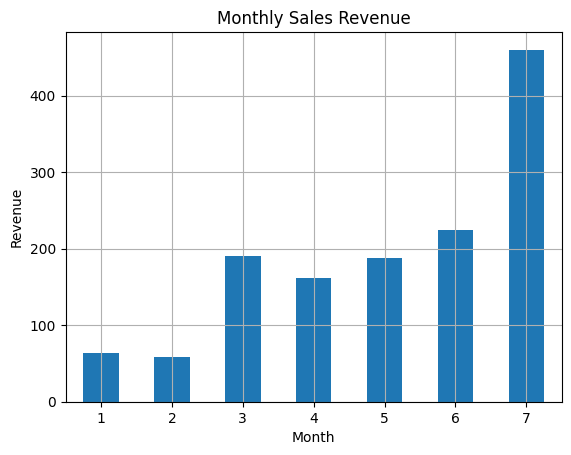

In [ ]:
#Monthly Sales Revenue
df['Month'] = df['Transaction Date'].dt.month
df['Revenue'] = df['Product'].str.split(',').apply(lambda x: len(x))  # Assume 1 unit = 1 currency
monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue.plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Revenue')
plt.grid(True)
plt.show()


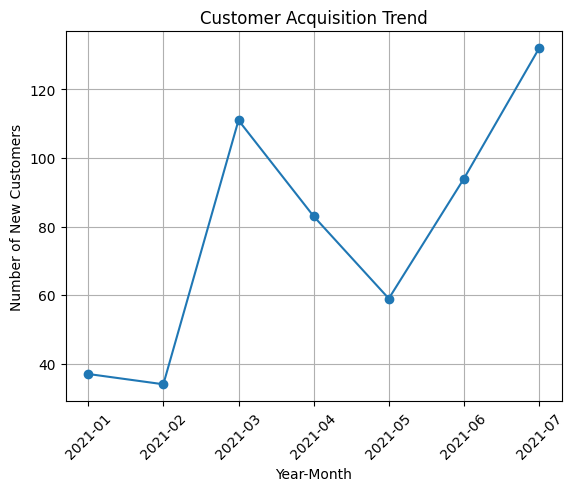

In [ ]:
# Extract month and year from Transaction Date
df['YearMonth'] = df['Transaction Date'].dt.to_period('M')

# Group by YearMonth and count unique customers
acquisition_data = df.groupby('YearMonth')['Name'].nunique()

# Convert YearMonth to string representation
acquisition_data.index = acquisition_data.index.astype(str)

# Plot the customer acquisition trend
plt.plot(acquisition_data.index, acquisition_data.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Acquisition Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
